**COMP0120 Project Code - Support Vector Machines (SVMs)**

**John Duffy, Student Number: 19154676**

# Global Imports

In [1]:
# Global imports.

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import and load Iris dataset.

from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]
y_names = iris["target_names"]


# Introduction

## Linear Binary Classification

Generate some images for the report.

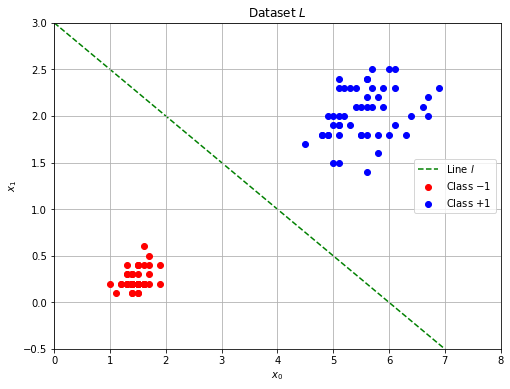

In [3]:
# intro_0.pdf

plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
plt.scatter(X[y == 0, 2], X[y == 0, 3], color="red", label="Class $-1$", zorder=2)
plt.scatter(X[y == 2, 2], X[y == 2, 3], color="blue", label="Class $+1$", zorder=2)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.0
x1 = m * x0 + c
plt.plot(x0, x1, "--g", label="Line $l$", zorder=1)
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid(zorder=0)
plt.savefig("intro_0.pdf")
plt.show()


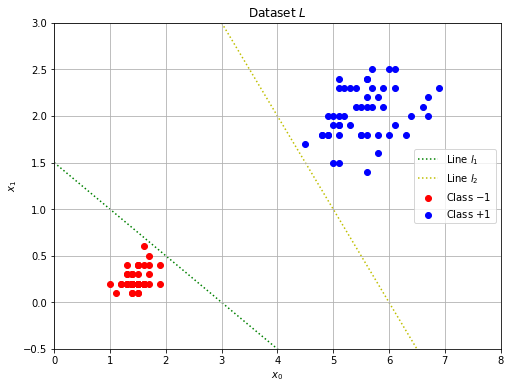

In [4]:
# intro_02.pdf

plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
plt.scatter(X[y == 0, 2], X[y == 0, 3], color="red", label="Class $-1$", zorder=2)
plt.scatter(X[y == 2, 2], X[y == 2, 3], color="blue", label="Class $+1$", zorder=2)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.5
x1 = m * x0 + c
plt.plot(x0, x1, ":g", label="Line $l_1$", zorder=1)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -1
c = 6
x1 = m * x0 + c
plt.plot(x0, x1, ":y", label="Line $l_2$", zorder=1)
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid(zorder=0)
plt.savefig("intro_1.pdf")
plt.show()


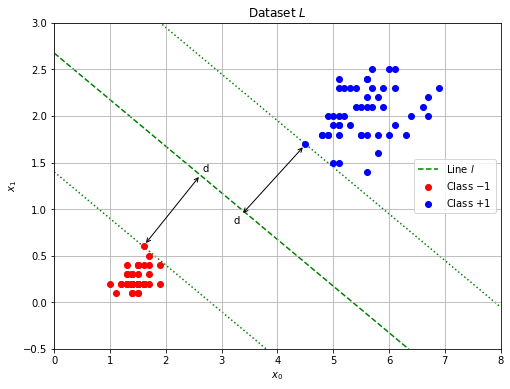

In [5]:
# intro_03.pdf

plt.figure(figsize=(8, 6))
plt.xlim(0, 8)
plt.ylim(-0.5, 3)
plt.scatter(X[y == 0, 2], X[y == 0, 3], color="red", label="Class $-1$", zorder=2)
plt.scatter(X[y == 2, 2], X[y == 2, 3], color="blue", label="Class $+1$", zorder=2)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 1.4
x1 = m * x0 + c
plt.plot(x0, x1, ":g", zorder=1)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 3.95
x1 = m * x0 + c
plt.plot(x0, x1, ":g", zorder=1)
x0 = np.arange(plt.xlim()[0], plt.xlim()[1], 0.01)
m = -0.5
c = 2.675
x1 = m * x0 + c
plt.plot(x0, x1, "--g", label="Line $l$", zorder=1)
plt.annotate("d", xy=(1.62, 0.62), xytext=(2.65, 1.4), arrowprops=dict(arrowstyle="<->"))
plt.annotate("d", xy=(4.48, 1.68), xytext=(3.21, 0.85), arrowprops=dict(arrowstyle="<->"))
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid(zorder=0)
plt.savefig("intro_2.pdf")
plt.show()


# Mathematical Setting

## Linear Binary Classification

### Backtracking, Steepest Descent and Newton

In [6]:
# Steepest_descent and backtracking.

def backtracking(f, df, x, p, alpha0=1.0, rho=0.1, c1=1e-4):
    '''
    This function implements the backtracking algorithm. Note the use of
    lambda expressions to pass the f and df parameters. This function
    returns a Numpy array of the alpha iterations.
    '''
    alpha = alpha0
    alphas = [alpha]
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(df(x), p):
        alpha = rho * alpha
        alphas.append(alpha)
    return np.array(alphas)


def steepest_descent(f, df, d2f, x0, tol=1e-6, max_i=50000):  # d2f Ignored!
    '''
    This function implements the steepest descent algorithm. Note the use of
    lambda expressions to pass the f and df parameters. This function
    returns number of iterations and a Numpy array of the iterations steps.
    '''    
    x = x0
    xs = [x]
    i = 0
    while i < max_i:
        i += 1
        p = -1.0 * df(x)
        alphas = backtracking(f, df, x, p)
        x_1 = x
        x = x_1 + alphas[-1] * p
        xs.append(x)
        if np.linalg.norm(x - x_1) / np.linalg.norm(x_1) < tol:
            break
    return (i, np.array(xs))


def newton(f, df, d2f, x0, tol=1e-6, max_i=50000):
    '''
    This function implements the Newton descent algorithm. Note the use of
    lambda expressions to pass the f and df parameters. This function
    returns number of iterations and a Numpy array of the iterations steps.
    '''    
    x = x0
    xs = [x]
    i = 0
    while i < max_i:
        i += 1
        p = -1.0 * np.linalg.inv(d2f(x)) @ df(x)
        alphas = backtracking(f, df, x, p)
        x_1 = x
        x = x + alphas[-1] * p
        xs.append(x)
        if np.linalg.norm(x - x_1) / np.linalg.norm(x_1) < tol:
            break
    return (i, np.array(xs))


### Rosenbrock Test (as per Assignment 1)

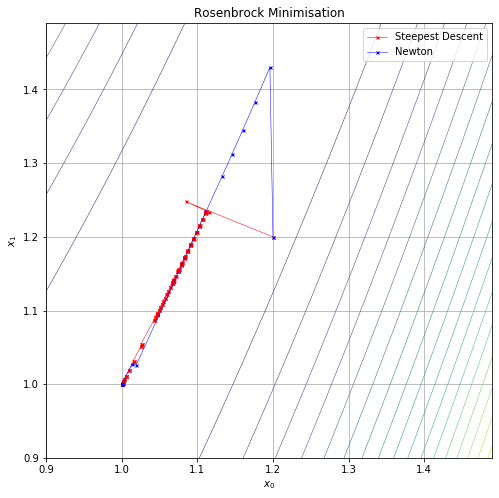

Steepest Descent:
 Iters:  196
 Alphas:  [1.00013305 1.00026664]
Newton:
 Iters:  11
 Alphas:  [1. 1.]


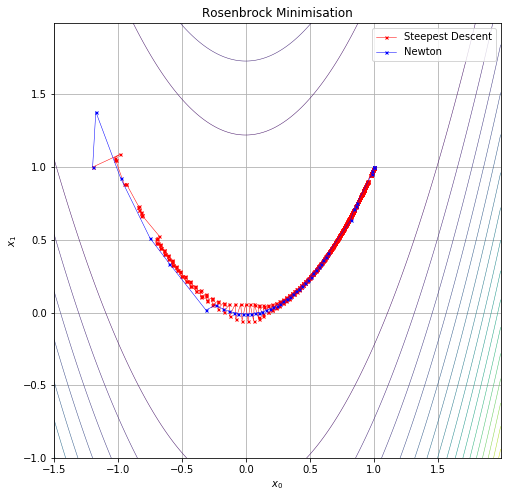

Steepest Descent:
 Iters:  872
 Alphas:  [0.99937461 0.99874711]
Newton:
 Iters:  48
 Alphas:  [1. 1.]


In [7]:
# Rosenbrock functionality test of Backtracking, Steepest Descent, and Newton

a = 1
b = 100

f   = lambda x: (a - x[0])**2 + b*(x[1] - x[0]**2)**2

df  = lambda x: np.array([-2.0 * (a - x[0]) - 4.0 * b * x[0] * (x[1] - x[0]**2),
                         2.0 * b * (x[1] - x[0]**2)])

d2f = lambda x: np.array([[2 + 8 * b * x[0]**2 - 4.0 * b * (x[1] - x[0]**2), -4.0 * b * x[0]],
                          [-4.0 * b * x[0], 2.0 * b]])

# rosenbrock_0.pdf

x0 = np.array([1.2, 1.2])

iters_steepest, xs_steepest = steepest_descent(f, df, d2f, x0)  # d2f ignored!
 
iters_newton, xs_newton = newton(f, df, d2f, x0)

x = np.arange(0.9, 1.5, 0.01)
y = np.arange(0.9, 1.5, 0.01)
xx, yy = np.meshgrid(x, y)
z = (a - xx)**2 + b * (yy - xx**2)**2

plt.figure(figsize=(8, 8))
plt.contour(x,y,z, linewidths=0.5, levels=20)
plt.plot(xs_steepest[:, 0], xs_steepest[:, 1], '-rx', linewidth=0.5, markersize=3)
plt.plot(xs_newton[:, 0], xs_newton[:, 1], '-bx', linewidth=0.5, markersize=3)

plt.title("Rosenbrock Minimisation")
plt.legend(["Steepest Descent", "Newton"])
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid()
plt.savefig("rosenbrock_0.pdf")
plt.show()

print("Steepest Descent:")
print(" Iters: ", iters_steepest)
print(" Alphas: ", xs_steepest[-1])

print("Newton:")
print(" Iters: ", iters_newton)
print(" Alphas: ", xs_newton[-1])


# rosenbrock_1.pdf

x0 = np.array([-1.2, 1.0])

iters_steepest, xs_steepest = steepest_descent(f, df, None, x0)  # d2f ignored.

iters_newton, xs_newton = newton(f, df, d2f, x0)

x = np.arange(-1.5, 2.0, 0.01)
y = np.arange(-1.0, 2.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = (a - xx)**2 + b * (yy - xx**2)**2

plt.figure(figsize=(8, 8))
plt.contour(x,y,z, linewidths=0.5, levels=20)
plt.plot(xs_steepest[:, 0], xs_steepest[:, 1], '-rx', linewidth=0.5, markersize=3)
plt.plot(xs_newton[:, 0], xs_newton[:, 1], '-bx', linewidth=0.5, markersize=3)

plt.title("Rosenbrock Minimisation")
plt.legend(["Steepest Descent", "Newton"])
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.grid()
plt.savefig("rosenbrock_1.pdf")
plt.show()

print("Steepest Descent:")
print(" Iters: ", iters_steepest)
print(" Alphas: ", xs_steepest[-1])

print("Newton:")
print(" Iters: ", iters_newton)
print(" Alphas: ", xs_newton[-1])


# Linear Binary Classification SVM

## Implementation

In [8]:
# Linear kernel function.

linear_kernel = lambda xi, xj: xi @ xj

In [9]:
# Linear SVM implementation.

def quadratic_penalty_dual_solver(X, y, kernel, descent_function, mu=500):

    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])

    f   = lambda x: 0.5 * x @ H @ x - x @ (x / x) + 0.5 * mu * (y @ x)**2
    df  = lambda x: H @ x - x / x + mu * y * (y @ x)
    d2f = lambda x: H + mu * y * y 

    iters, xs = descent_function(f, df, d2f, x0=np.ones((len(X))))
    
    return (iters, xs)


def augmented_lagrangian_dual_solver(X, y, kernel, descent_function, mu=100.0, gamma=10.0):

    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])
            
    f   = lambda x: 0.5 * x @ H @ x - np.sum(x) + 0.5 * mu * (y @ x)**2 - gamma * np.sum(x)
    df  = lambda x: H @ x - np.ones(len(X)) + mu * y * (y @ x) - gamma * np.ones(len(x))
    d2f = lambda x: H + mu * y * y 

    iters, xs = descent_function(f, df, d2f, x0=np.full(len(X), 1.0))

    return (iters, xs)


import scipy

def scipy_cg_dual_solver(X, y, kernel, descent_function, mu=200):

    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])

    f   = lambda x: 0.5 * x @ H @ x - x @ (x / x) + 0.5 * mu * (y @ x)**2
    df  = lambda x: H @ x - x / x + mu * y * (y @ x)
    d2f = lambda x: H + mu * y * y 

    result = scipy.optimize.minimize(f, np.full((len(X)), 200), method='CG')
    
    return (result.nit, np.array([result.x]))


def kkt_system_dual_solver(X, y, kernel, descent_function=None):

    L = len(X)
    
    P = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            P[i, j] = y[i] * y[j] * kernel(X[i], X[j])
            
    q = np.full((L), -1.0)
    A = y
    KKT = np.zeros((L + 1, L + 1))
    KKT[0:L, 0:L] = P
    KKT[-1, 0:L] = A
    KKT[0:L, -1] = A
    RHS = np.zeros((L + 1))
    RHS[0:L] = -1.0 * q

    return (None, np.array([np.linalg.solve(KKT, RHS)[0:L]]))


def w_func(X, y, a):

    X_sv = X[np.nonzero(a > 0.0)]
    y_sv = y[np.nonzero(a > 0.0)]
    a_sv = a[np.nonzero(a > 0.0)]

    M, N = X_sv.shape
    w = np.zeros((N))
    for i in range(M):
        w = w + a_sv[i] * y_sv[i] * X_sv[i]

    return w


def b_func(X, y, a):

    X_sv = X[np.nonzero(a > 0.0)]
    y_sv = y[np.nonzero(a > 0.0)]
    a_sv = a[np.nonzero(a > 0.0)]

    b = 0.0
    for i in range(len(X_sv)):
        inner = 0.0
        for j in range(len(X_sv)):
            inner += a_sv[j] * y_sv[j] * (X_sv[i] @ X_sv[j])
        b += y_sv[i] - inner

    return b / len(X_sv)


class LinearSVM(object):
    
    def __init__(self):

        return
    

    def train(self, X, y, kernel, dual_solver, descent_method):

        assert len(X) == len(y), "X and y lengths mismatch"
        
        self.i, self.xs = dual_solver(X, y, kernel, descent_method)
        self.a          = self.xs[-1]
        self.s          = X[np.nonzero(self.a > 0.0)]
        self.w          = w_func(X, y, self.a)        
        self.b          = b_func(X, y, self.a)
        self.d          = 1.0 / np.linalg.norm(self.w)

        return


    def predict(self, x):

        return np.sign(self.w @ x + self.b)


## Linear SVM Test 1

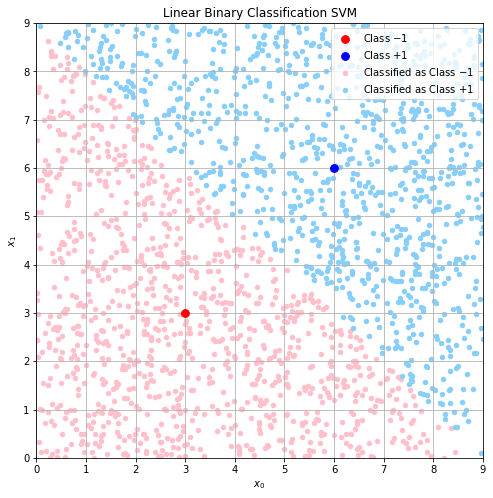

Itertions:
 115
Alphas:
 [0.12311629 0.11711603]
Support Vectors:
 [[3. 3.]
 [6. 6.]]
w:
 [0.33334727 0.33334727]
b:
 -3.0001254473834473
Margin:
 2.121231642573227




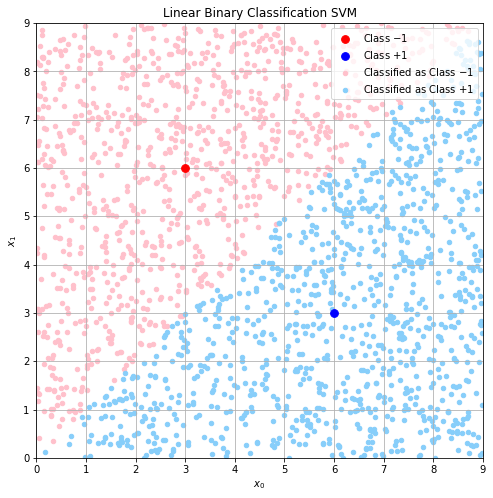

Itertions:
 8
Alphas:
 [0.11111112 0.11111112]
Support Vectors:
 [[3. 6.]
 [6. 3.]]
w:
 [ 0.33333336 -0.33333336]
b:
 0.0
Margin:
 2.121320173854028




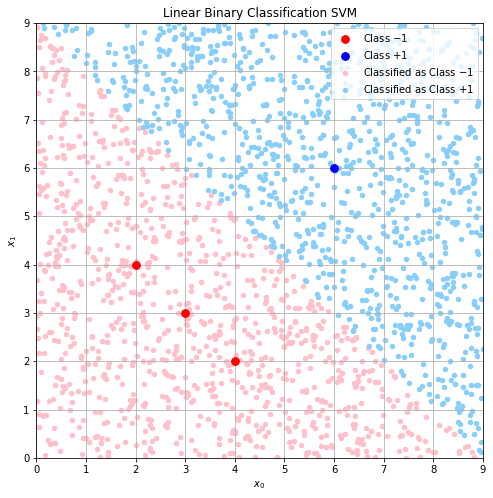

Itertions:
 1253
Alphas:
 [0.04104399 0.04104399 0.04104399 0.11713205]
Support Vectors:
 [[2. 4.]
 [3. 3.]
 [4. 2.]
 [6. 6.]]
w:
 [0.3333964 0.3333964]
b:
 -3.000473004866972
Margin:
 2.1209190615442166




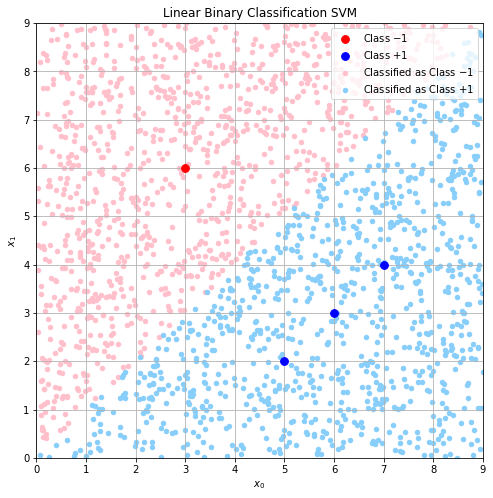

Itertions:
 1522
Alphas:
 [0.11111534 0.03697217 0.037038   0.03710384]
Support Vectors:
 [[3. 6.]
 [5. 2.]
 [6. 3.]
 [7. 4.]]
w:
 [ 0.33346966 -0.33321838]
b:
 -0.0011467909155819522
Margin:
 2.1212521606593167




In [10]:
# Linear SVM Test 1.

N = 2000

for plot, (X, y) in enumerate([([[3.0, 3.0], [6.0, 6.0]], [-1.0, +1.0]),
                               ([[3.0, 6.0], [6.0, 3.0]], [-1.0, +1.0]),
                               ([[2.0, 4.0], [3.0, 3.0], [4.0, 2.0], [6.0, 6.0]], [-1.0, -1.0, -1.0, +1.0]),
                               ([[3.0, 6.0], [5.0, 2.0], [6.0, 3.0], [7.0, 4.0]], [-1.0, +1.0, +1.0, +1.0])]):

    linear_svm = LinearSVM()

    X_train = np.array(X)
    y_train = np.array(y)

    linear_svm.train(X_train, y_train, linear_kernel, quadratic_penalty_dual_solver, steepest_descent)

    X_new = np.zeros((N, 2))

    for i in range(N):
        X_new[i, 0] = np.random.uniform(0.0, 9.0)
        X_new[i, 1] = np.random.uniform(0.0, 9.0)

    y_new = np.zeros(N)

    for i in range(N):
        y_new[i] = linear_svm.predict(X_new[i])

    plt.figure(figsize=(8, 8))
    plt.xlim((0.0, 9.0))
    plt.ylim((0.0, 9.0))
    plt.scatter(X_train[y_train == -1.0, 0], X_train[y_train == -1.0, 1], color="red", s=60, zorder=2)
    plt.scatter(X_train[y_train == +1.0, 0], X_train[y_train == +1.0, 1], color="blue", s=60, zorder=2)
    plt.scatter(X_new[y_new == -1.0, 0], X_new[y_new == -1.0, 1], color="pink", s=20, zorder=1)
    plt.scatter(X_new[y_new == +1.0, 0], X_new[y_new == +1.0, 1], color="lightskyblue", s=20, zorder=1)
    plt.title("Linear Binary Classification SVM")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.legend([ "Class $-1$", "Class $+1$", "Classified as Class $-1$", "Classified as Class $+1$"], loc="upper right")
    plt.grid(zorder=0)
    plt.savefig("linear_svm_qp_{}.pdf".format(plot))
    plt.show()
    

    print("Itertions:\n", linear_svm.i)
    print("Alphas:\n", linear_svm.a)
    print("Support Vectors:\n", linear_svm.s)
    print("w:\n", linear_svm.w)
    print("b:\n", linear_svm.b)
    print("Margin:\n", linear_svm.d)
    print("\n")


## Linear SVM Test 2

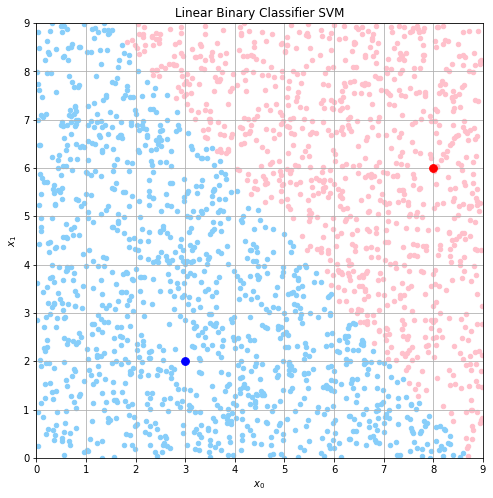

Itertions:
 130
Alphas:
 [0.0511614  0.05540453]
Support Vectors:
 [[8. 6.]
 [3. 2.]]
w:
 [-0.24307761 -0.19615934]
b:
 2.1215641830695042
Margin:
 3.2014926726185893




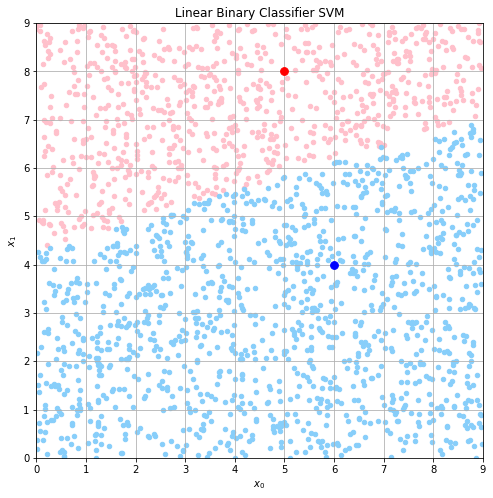

Itertions:
 73
Alphas:
 [0.12398024 0.11999477]
Support Vectors:
 [[6. 4.]
 [5. 8.]]
w:
 [ 0.14390759 -0.46403719]
b:
 1.9927313817034333
Margin:
 2.05829340488686




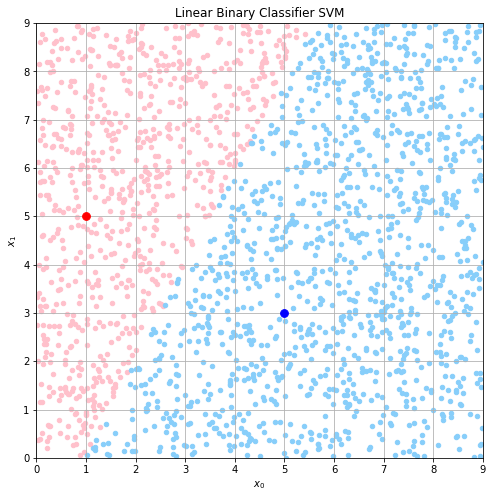

Itertions:
 15
Alphas:
 [0.09977248 0.10053556]
Support Vectors:
 [[5. 3.]
 [1. 5.]]
w:
 [ 0.39832682 -0.20336038]
b:
 -0.3815389411541442
Margin:
 2.2359578727262672




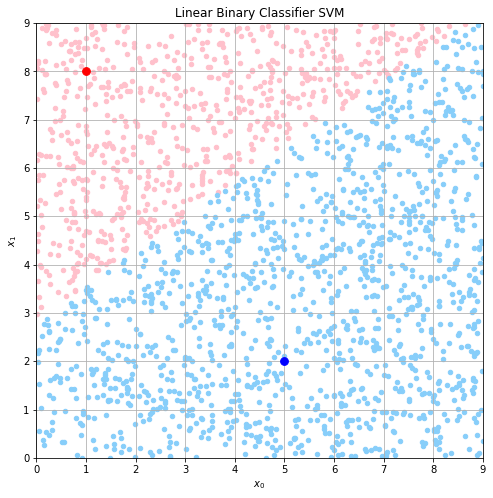

Itertions:
 89
Alphas:
 [0.0382602  0.03957198]
Support Vectors:
 [[1. 8.]
 [5. 2.]]
w:
 [ 0.15959972 -0.22693763]
b:
 0.6558890254531922
Margin:
 3.604387490255304




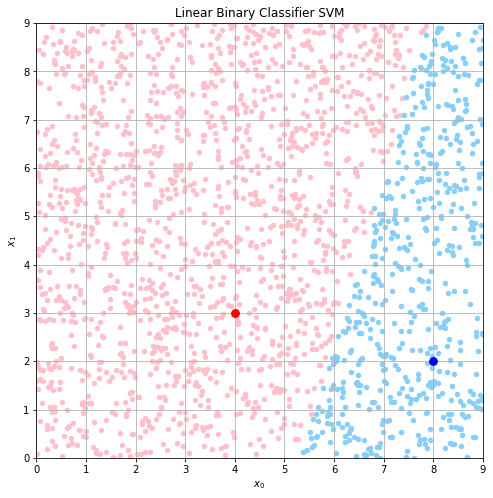

Itertions:
 139
Alphas:
 [0.12140577 0.12631684]
Support Vectors:
 [[8. 2.]
 [4. 3.]]
w:
 [ 0.46597879 -0.13613897]
b:
 -2.455525313205409
Margin:
 2.0599078807794475




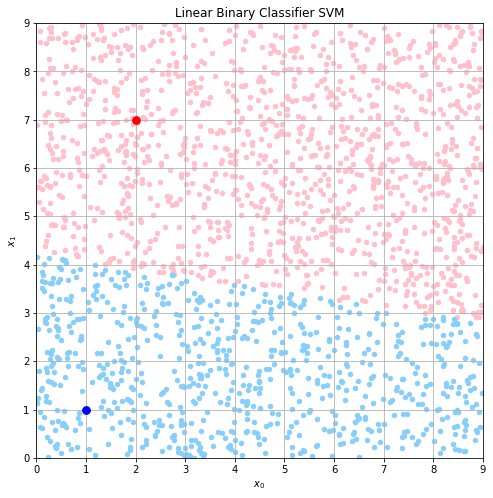

Itertions:
 113
Alphas:
 [0.05457255 0.05732547]
Support Vectors:
 [[2. 7.]
 [1. 1.]]
w:
 [-0.05181963 -0.32468239]
b:
 1.3764589928748554
Margin:
 3.0414400924719174




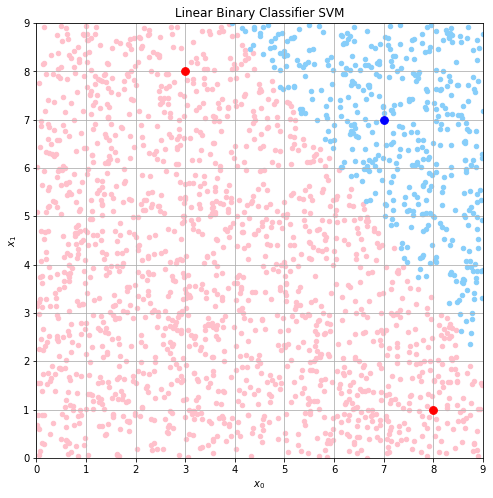

Itertions:
 1142
Alphas:
 [0.12129171 0.20460131 0.31328162]
Support Vectors:
 [[8. 1.]
 [3. 8.]
 [7. 7.]]
w:
 [0.60883374 0.43486914]
b:
 -6.305637872919024
Margin:
 1.3365572007507145




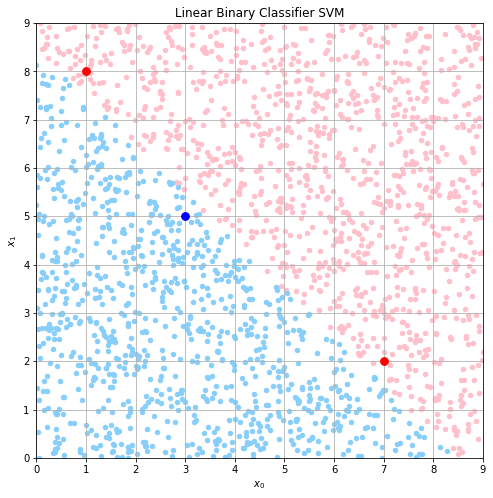

Itertions:
 7505
Alphas:
 [4.2930812  1.76901992 2.49016403]
Support Vectors:
 [[3. 5.]
 [7. 2.]
 [1. 8.]]
w:
 [-1.99405988 -1.9939461 ]
b:
 16.94795007465403
Margin:
 0.3546167100540451




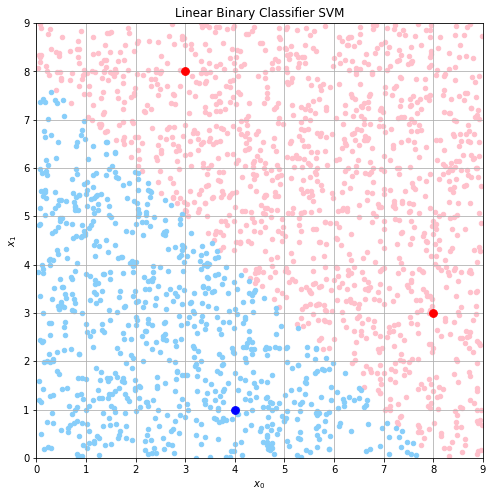

Itertions:
 537
Alphas:
 [0.09405315 0.12089808 0.02151107]
Support Vectors:
 [[8. 3.]
 [4. 1.]
 [3. 8.]]
w:
 [-0.33336614 -0.33334998]
b:
 2.6668973049341815
Margin:
 2.121162983736238




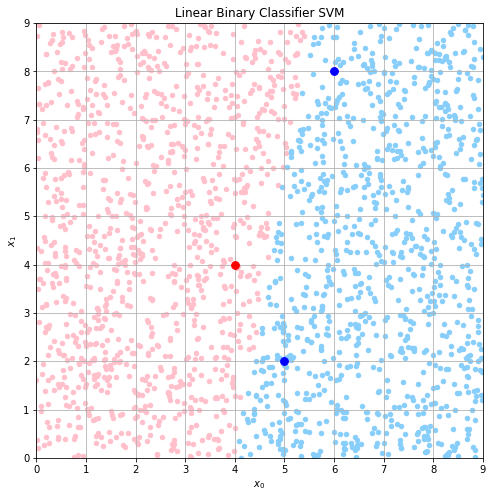

Itertions:
 1781
Alphas:
 [1.19927107 0.82521466 0.36204603]
Support Vectors:
 [[4. 4.]
 [5. 2.]
 [6. 8.]]
w:
 [ 1.50126521 -0.25028672]
b:
 -6.004988009483206
Margin:
 0.6570363700346306




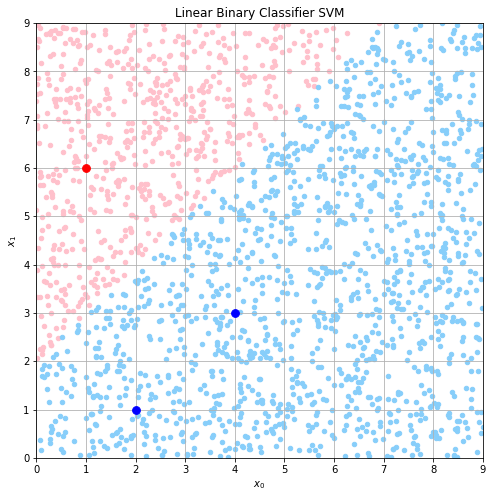

Itertions:
 986
Alphas:
 [0.10991859 0.00231016 0.11089585]
Support Vectors:
 [[4. 3.]
 [2. 1.]
 [1. 6.]]
w:
 [ 0.33339884 -0.33330914]
b:
 0.6664331777472177
Margin:
 2.121188851672618




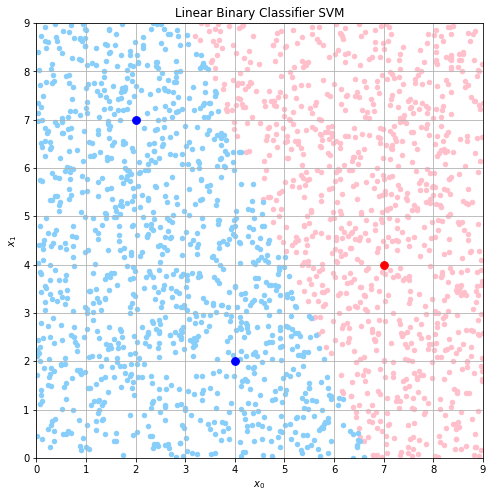

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]
w:
 [-0.52637123 -0.21058176]
b:
 3.526796306329785
Margin:
 1.7638814512223358




In [11]:
# Linear SVM Test 2.

np.random.seed(5)

N = 2000

for T in [2, 3]:

    for plot in range(6):

        linear_svm = LinearSVM()

        X_train = np.zeros((T, 2))
        y_train = np.zeros(T)

        X_train[:, 0] = np.random.choice(range(1, 9), size=(T), replace=False)
        X_train[:, 1] = np.random.choice(range(1, 9), size=(T), replace=False)

        y_train[:] = np.random.choice([-1.0, +1.0], size=(T))
        if len(y_train[y_train == -1.0]) == 0:
            y_train[np.random.randint(0, T)] = -1.0    
        if len(y_train[y_train == +1.0]) == 0:
            y_train[np.random.randint(0, T)] = +1.0    

        linear_svm.train(X_train, y_train, linear_kernel, quadratic_penalty_dual_solver, steepest_descent)

        X_new = np.zeros((N, 2))

        for i in range(N):
            X_new[i, 0] = np.random.uniform(0.0, 9.0)
            X_new[i, 1] = np.random.uniform(0.0, 9.0)

        y_new = np.zeros(N)

        for i in range(N):
            y_new[i] = linear_svm.predict(X_new[i])

        plt.figure(figsize=(8, 8))
        plt.xlim((0.0, 9.0))
        plt.ylim((0.0, 9.0))
        plt.scatter(X_train[y_train == -1.0, 0], X_train[y_train == -1.0, 1], color="red", s=60, zorder=2)
        plt.scatter(X_train[y_train == +1.0, 0], X_train[y_train == +1.0, 1], color="blue", s=60, zorder=2)
        plt.scatter(X_new[y_new == -1.0, 0], X_new[y_new == -1.0, 1], color="pink", s=20, zorder=1)
        plt.scatter(X_new[y_new == +1.0, 0], X_new[y_new == +1.0, 1], color="lightskyblue", s=20, zorder=1)
        #for sv in svm.sv:
        #    plt.scatter(sv[0], sv[1], s=300, facecolors='none', edgecolors='b')
        plt.title("Linear Binary Classifier SVM")
        plt.xlabel("$x_0$")
        plt.ylabel("$x_1$")
        #plt.legend([ "Class $-1$", "Class $+1$", "Classified as Class $-1$", "Classified as Class $+1$"], loc="upper right")
        plt.grid(zorder=0)
        plt.savefig("linear_svm_rand_qp_{}_{}.pdf".format(T, plot))
        plt.show()

        print("Itertions:\n", linear_svm.i)
        print("Alphas:\n", linear_svm.a)
        print("Support Vectors:\n", linear_svm.s)
        print("w:\n", linear_svm.w)
        print("b:\n", linear_svm.b)
        print("Margin:\n", linear_svm.d)
        print("\n")


# Linear Optimisation Problem

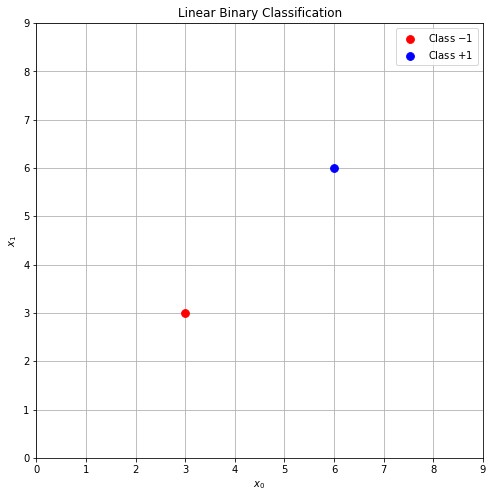

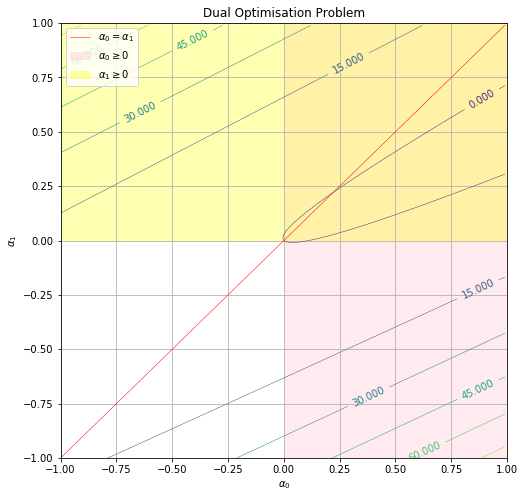

In [12]:
# Linear Optimisation Problem.

X = np.array([[3.0, 3.0], [6.0, 6.0]])
y = np.array([-1.0, +1.0])

plt.figure(figsize=(8, 8))
plt.xlim((0.0, 9.0))
plt.ylim((0.0, 9.0))
plt.scatter(X[y == -1.0, 0], X[y == -1.0, 1], color="red", s=60, zorder=2)
plt.scatter(X[y == +1.0, 0], X[y == +1.0, 1], color="blue", s=60, zorder=2)
plt.title("Linear Binary Classification")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(["Class $-1$", "Class $+1$"], loc="upper right")
plt.grid(zorder=0)
plt.savefig("linear_problem_data_0.pdf")
plt.show()

L = len(X)
H = np.zeros((L, L))
for i in range(L):
    for j in range(L):
        H[i, j] = y[i] * y[j] * linear_kernel(X[i], X[j])

f   = lambda x: 0.5 * x @ H @ x - x @ (x / x)
df  = lambda x: H @ x - x / x
d2f = lambda x: H

g = lambda x, y: f(np.array([x, y]))
z = np.vectorize(g)

x_range = np.arange(-1.0, 1.0, 0.01)
y_range = np.arange(-1.0, 1.0, 0.01)

x, y = np.meshgrid(x_range, y_range)

plt.figure(figsize=(8, 8))
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))
plt.title("Dual Optimisation Problem")
plt.xlabel(r"$\alpha_0$")
plt.ylabel(r"$\alpha_1$")
cs = plt.contour(x, y, z(x, y), linewidths=0.5)
plt.clabel(cs)
plt.fill(np.array([0.0, 0.0, 14.0, 14.0]), np.array([-2.0, 14.0, 14.0, -2.0]), alpha=0.3, color="pink", label=r"$\alpha_0 \geq 0$")
plt.fill(np.array([-2.0, -2.0, 14.0, 14.0]), np.array([0.0, 14.0, 14.0, 0.0]), alpha=0.3, color="yellow", label=r"$\alpha_1 \geq 0$")
plt.plot(x_range, y_range, '-r', linewidth=0.5, label=r"$\alpha_0 = \alpha_1$")
plt.grid()
plt.legend()
plt.savefig("linear_problem_dual_0.pdf")
plt.show()

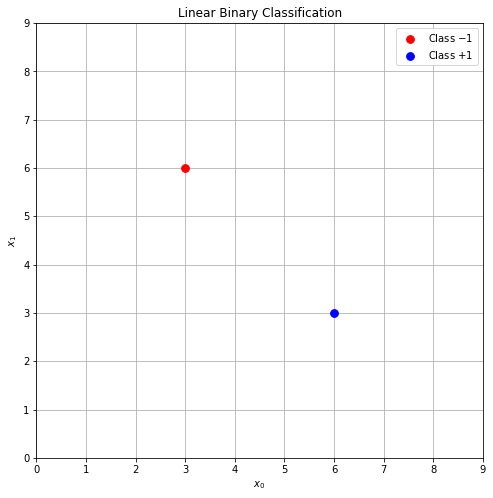

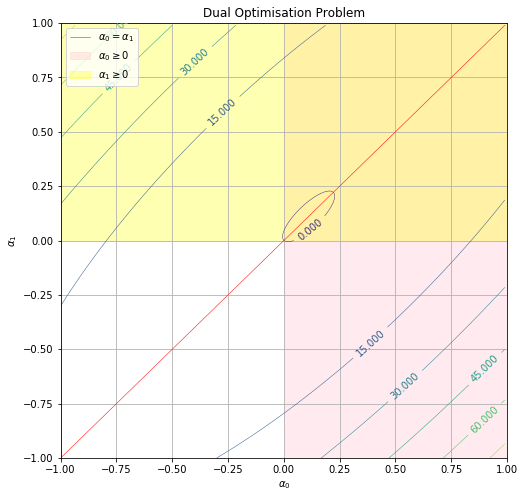

In [13]:
# Linear Optimisation Problem.

X = np.array([[3.0, 6.0], [6.0, 3.0]])
y = np.array([-1.0, +1.0])

plt.figure(figsize=(8, 8))
plt.xlim((0.0, 9.0))
plt.ylim((0.0, 9.0))
plt.scatter(X[y == -1.0, 0], X[y == -1.0, 1], color="red", s=60, zorder=2)
plt.scatter(X[y == +1.0, 0], X[y == +1.0, 1], color="blue", s=60, zorder=2)
plt.title("Linear Binary Classification")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(["Class $-1$", "Class $+1$"], loc="upper right")
plt.grid(zorder=0)
plt.savefig("linear_problem_data_1.pdf")
plt.show()

L = len(X)
H = np.zeros((L, L))
for i in range(L):
    for j in range(L):
        H[i, j] = y[i] * y[j] * linear_kernel(X[i], X[j])

f   = lambda x: 0.5 * x.T @ H @ x - x.T @ (x / x)
df  = lambda x: H @ x - x / x
d2f = lambda x: H

g = lambda x, y: f(np.array([x, y]))
z = np.vectorize(g)

x_range = np.arange(-1.0, 1.0, 0.01)
y_range = np.arange(-1.0, 1.0, 0.01)

x, y = np.meshgrid(x_range, y_range)

plt.figure(figsize=(8, 8))
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))
plt.title("Dual Optimisation Problem")
plt.xlabel(r"$\alpha_0$")
plt.ylabel(r"$\alpha_1$")
cs = plt.contour(x, y, z(x, y), linewidths=0.5)
plt.clabel(cs)
plt.fill(np.array([0.0, 0.0, 14.0, 14.0]), np.array([-2.0, 14.0, 14.0, -2.0]), alpha=0.3, color="pink", label=r"$\alpha_0 \geq 0$")
plt.fill(np.array([-2.0, -2.0, 14.0, 14.0]), np.array([0.0, 14.0, 14.0, 0.0]), alpha=0.3, color="yellow", label=r"$\alpha_1 \geq 0$")
plt.plot(x_range, y_range, '-r', linewidth=0.5, label=r"$\alpha_0 = \alpha_1$")
plt.grid()
plt.legend()
plt.savefig("linear_problem_dual_1.pdf")
plt.show()

# Solving Linear Optimisation Problem

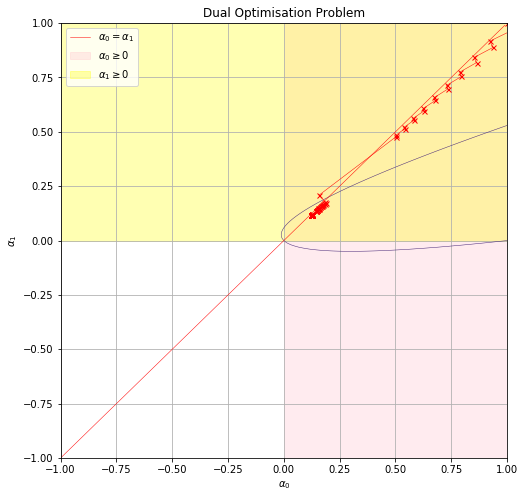

In [14]:
# Quadratic Penalty Method for solving the Dual Problem.

X_train = np.array([[3.0, 3.0], [6.0, 6.0]])
y_train = np.array([-1.0, +1.0])

iters, xs = quadratic_penalty_dual_solver(X_train, y_train, linear_kernel, steepest_descent, mu=500)

x = np.arange(-2.0, 14.0, 0.01)
y = np.arange(-2.0, 14.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = xx**2 + 17.0 * yy**2 - 8.0 * xx * yy - xx - yy

plt.figure(figsize=(8, 8))
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))
plt.title("Dual Optimisation Problem")
plt.xlabel(r"$\alpha_0$")
plt.ylabel(r"$\alpha_1$")
cs = plt.contour(x, y, z, linewidths=0.5)
plt.clabel(cs)
plt.fill(np.array([0.0, 0.0, 14.0, 14.0]), np.array([-2.0, 14.0, 14.0, -2.0]), alpha=0.3, color="pink", label=r"$\alpha_0 \geq 0$")
plt.fill(np.array([-2.0, -2.0, 14.0, 14.0]), np.array([0.0, 14.0, 14.0, 0.0]), alpha=0.3, color="yellow", label=r"$\alpha_1 \geq 0$")
plt.plot(x_range, y_range, '-r', linewidth=0.5, label=r"$\alpha_0 = \alpha_1$")
plt.plot(xs[:, 0], xs[:, 1], '-rx', linewidth=0.5, markersize=5)
plt.grid()
plt.legend()
plt.savefig("linear_problem_solv_0.pdf")
plt.show()


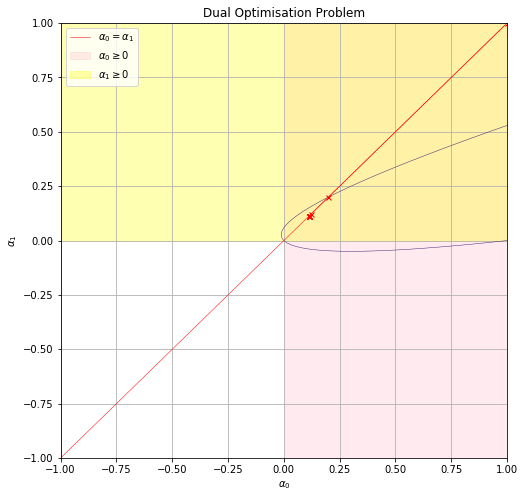

In [15]:
# Quadratic Penalty Method for solving the Dual Problem.

X_train = np.array([[3.0, 6.0], [6.0, 3.0]])
y_train = np.array([-1.0, +1.0])

iters, xs = quadratic_penalty_dual_solver(X_train, y_train, linear_kernel, steepest_descent, mu=500)

x = np.arange(-2.0, 14.0, 0.01)
y = np.arange(-2.0, 14.0, 0.01)
xx, yy = np.meshgrid(x, y)
z = xx**2 + 17.0 * yy**2 - 8.0 * xx * yy - xx - yy

plt.figure(figsize=(8, 8))
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))
plt.title("Dual Optimisation Problem")
plt.xlabel(r"$\alpha_0$")
plt.ylabel(r"$\alpha_1$")
cs = plt.contour(x, y, z, linewidths=0.5)
plt.clabel(cs)
plt.fill(np.array([0.0, 0.0, 14.0, 14.0]), np.array([-2.0, 14.0, 14.0, -2.0]), alpha=0.3, color="pink", label=r"$\alpha_0 \geq 0$")
plt.fill(np.array([-2.0, -2.0, 14.0, 14.0]), np.array([0.0, 14.0, 14.0, 0.0]), alpha=0.3, color="yellow", label=r"$\alpha_1 \geq 0$")
plt.plot(x_range, y_range, '-r', linewidth=0.5, label=r"$\alpha_0 = \alpha_1$")
plt.plot(xs[:, 0], xs[:, 1], '-rx', linewidth=0.5, markersize=5)
plt.grid()
plt.legend()
plt.savefig("linear_problem_solv_1.pdf")
plt.show()


# Non-Linear Binary Classification SVM

## Implementation

In [16]:
# Non-linear kernel function.

gaussian_kernel = lambda xi, xj: np.exp(-0.5 * np.linalg.norm(xi - xj)**2)  # Sigma = 1.0


In [17]:
# Non-Linear Binary Classification SVM implementation.

def quadratic_penatly_dual_solver(X, y, kernel, descent_function, mu=200.0):

    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])

    #f   = lambda x: 0.5 * x @ H @ x - np.sum(x) + 0.5 * mu * (y @ x)**2 
    #df  = lambda x: H @ x - np.ones(len(x)) + mu * y * (y @ x)
    #d2f = lambda x: H + mu * y * y

    f   = lambda x: 0.5 * x @ H @ x - x @ (x / x) + 0.5 * mu * (y @ x)**2 
    df  = lambda x: H @ x - x / x + mu * y * (y @ x)
    d2f = lambda x: H + mu * y * y

    i, xs = descent_function(f, df, d2f, x0=np.ones(len(X)))

    return (i, xs)


def augmented_lagrangian_dual_solver(X, y, kernel, descent_function, mu=200.0):

    L = len(X)
    
    H = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            H[i, j] = y[i] * y[j] * kernel(X[i], X[j])

    #f   = lambda x: 0.5 * x @ H @ x - np.sum(x) + 0.5 * mu * (y @ x)**2 
    #df  = lambda x: H @ x - np.ones(len(x)) + mu * y * (y @ x)
    #d2f = lambda x: H + mu * y * y

    f   = lambda x: 0.5 * x @ H @ x - x @ (x / x) + 0.5 * mu * (y @ x)**2 
    df  = lambda x: H @ x - x / x + mu * y * (y @ x)
    d2f = lambda x: H + mu * y * y

    i, xs = descent_function(f, df, d2f, x0=np.ones(len(X)))

    return (i, xs)


class NonLinearSVM(object):

    def __init__(self):        

        return


    def train(self, X, y, kernel, dual_solver, descent_method):

        assert len(X) == len(y), "X and y lengths mismatch"

        self.i, self.xs = dual_solver(X, y, kernel, descent_method)
        self.a          = self.xs[-1]
        self.s          = X[np.where(self.a > 0.0)]
        self.b          = 0.0
        
        return


    def predict(self, X, y, kernel, x):
        
        b = self.b
        for i in range(len(X)):
            b+= self.a[i] * y[i] * kernel(X[i], x)

        return np.sign(b)


## Non-Linear SVM Test 1

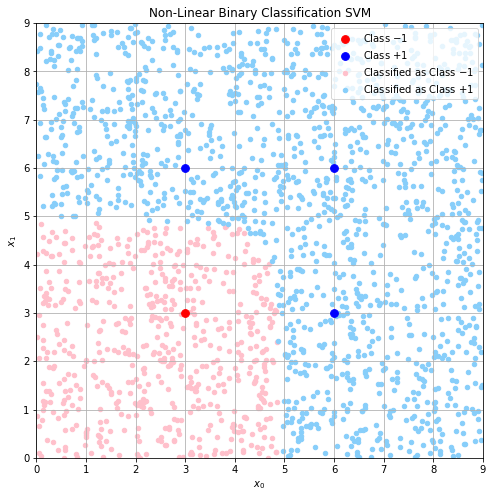

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




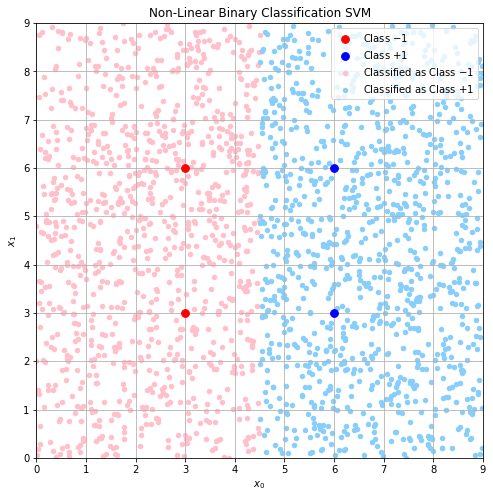

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




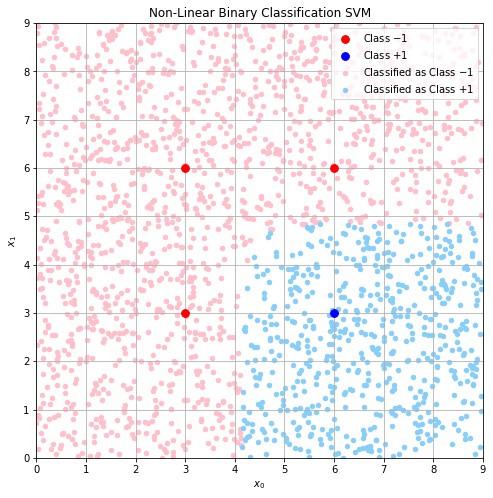

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




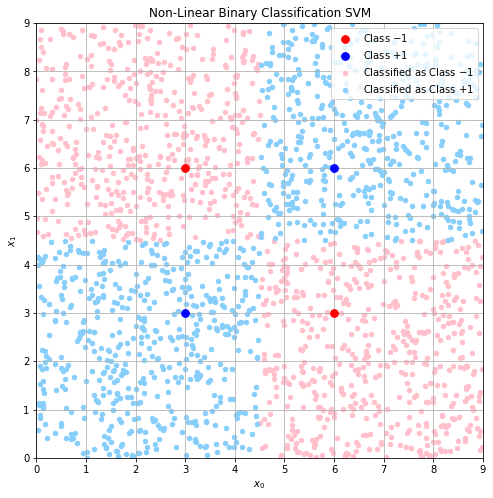

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




In [18]:
# Non-Linear SVM Test 1.

N = 2000

for plot, (X, y) in enumerate([([[3.0, 3.0], [3.0, 6.0], [6.0, 3.0], [6.0, 6.0]], [-1.0, +1.0, +1.0, +1.0]),
                               ([[3.0, 3.0], [3.0, 6.0], [6.0, 3.0], [6.0, 6.0]], [-1.0, -1.0, +1.0, +1.0]),
                               ([[3.0, 3.0], [3.0, 6.0], [6.0, 3.0], [6.0, 6.0]], [-1.0, -1.0, +1.0, -1.0]),
                               ([[3.0, 3.0], [3.0, 6.0], [6.0, 3.0], [6.0, 6.0]], [+1.0, -1.0, -1.0, +1.0])]):

    non_linear_svm = NonLinearSVM()

    X_train = np.array(X)
    y_train = np.array(y)

    non_linear_svm.train(X_train, y_train, gaussian_kernel, quadratic_penalty_dual_solver, steepest_descent)

    X_new = np.zeros((N, 2))

    for i in range(N):
        X_new[i, 0] = np.random.uniform(0.0, 9.0)
        X_new[i, 1] = np.random.uniform(0.0, 9.0)

    y_new = np.zeros(N)

    for i in range(N):
        y_new[i] = non_linear_svm.predict(X_train, y_train, gaussian_kernel, X_new[i])

    plt.figure(figsize=(8, 8))
    plt.xlim((0.0, 9.0))
    plt.ylim((0.0, 9.0))
    plt.scatter(X_train[y_train == -1.0, 0], X_train[y_train == -1.0, 1], color="red", s=60, zorder=2)
    plt.scatter(X_train[y_train == +1.0, 0], X_train[y_train == +1.0, 1], color="blue", s=60, zorder=2)
    plt.scatter(X_new[y_new == -1.0, 0], X_new[y_new == -1.0, 1], color="pink", s=20, zorder=1)
    plt.scatter(X_new[y_new == +1.0, 0], X_new[y_new == +1.0, 1], color="lightskyblue", s=20, zorder=1)
    plt.title("Non-Linear Binary Classification SVM")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.legend([ "Class $-1$", "Class $+1$", "Classified as Class $-1$", "Classified as Class $+1$"], loc="upper right")
    plt.grid(zorder=0)
    plt.savefig("non_linear_svm_qp_{}.pdf".format(plot))
    plt.show()

    print("Itertions:\n", linear_svm.i)
    print("Alphas:\n", linear_svm.a)
    print("Support Vectors:\n", linear_svm.s)
    print("\n")


## Non-Linear SVM Test 2

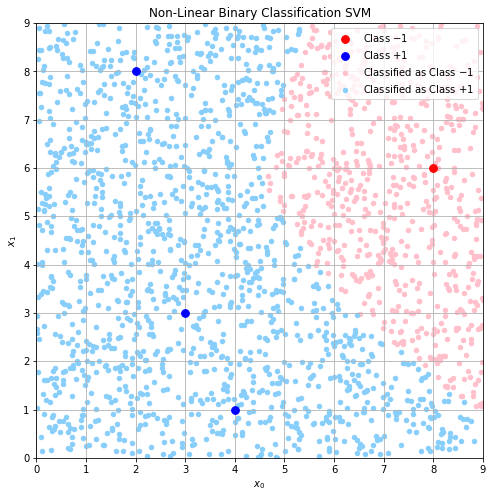

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




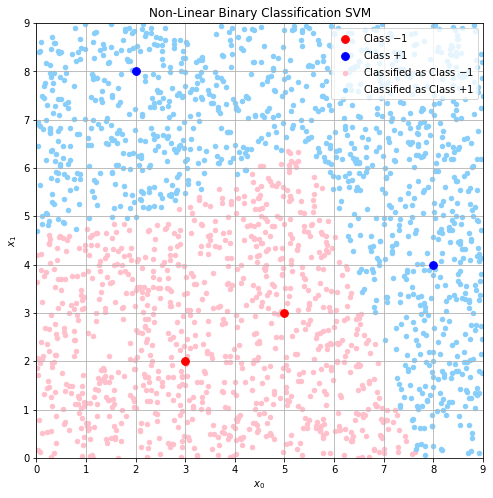

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




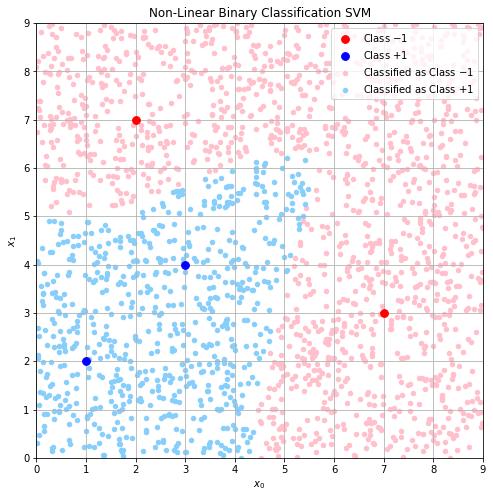

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




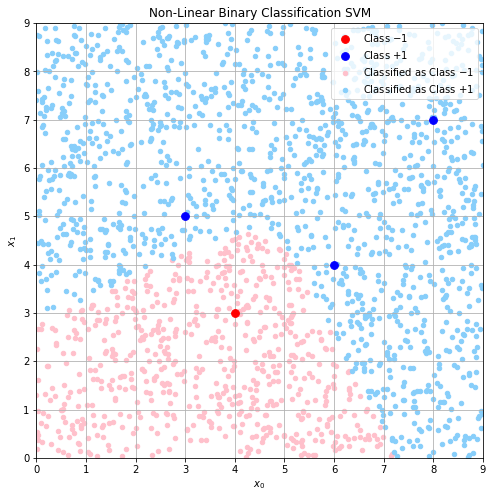

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




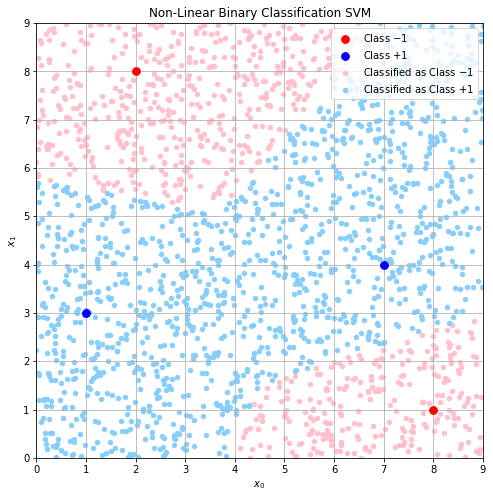

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




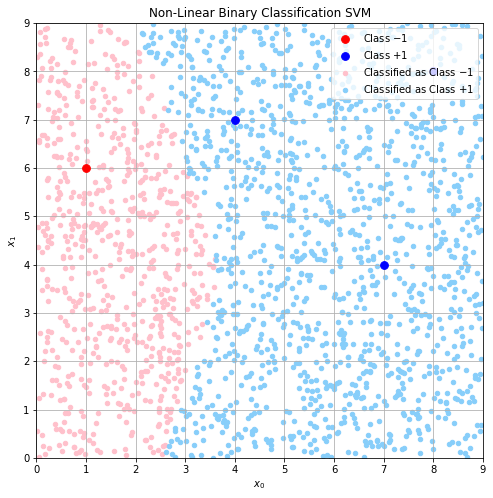

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




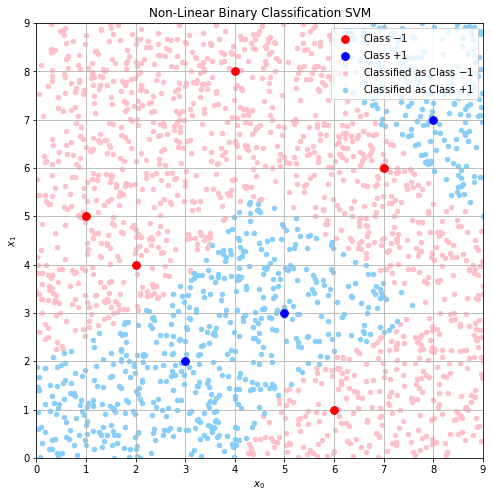

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




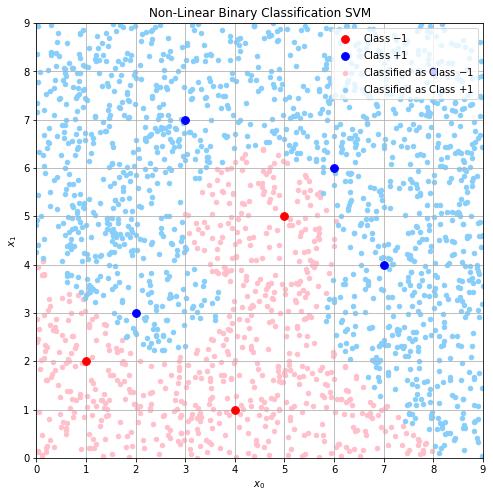

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




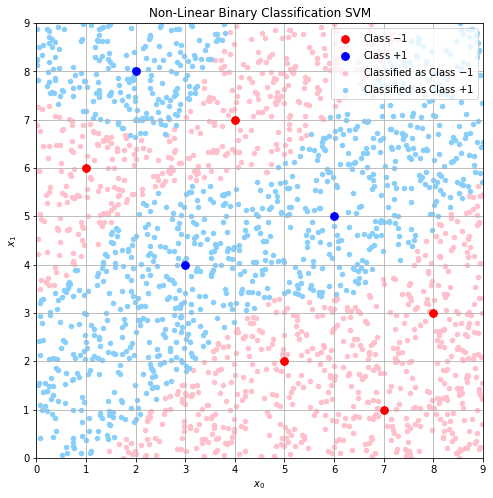

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




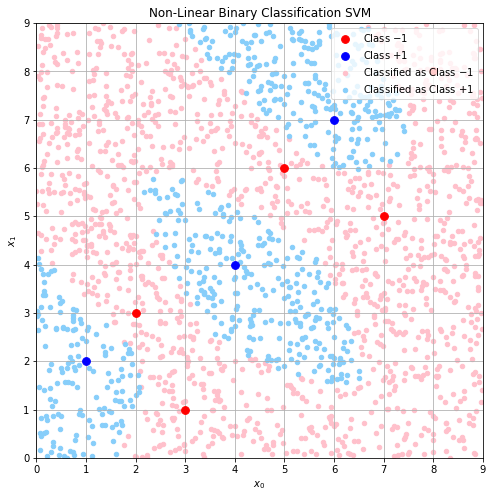

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




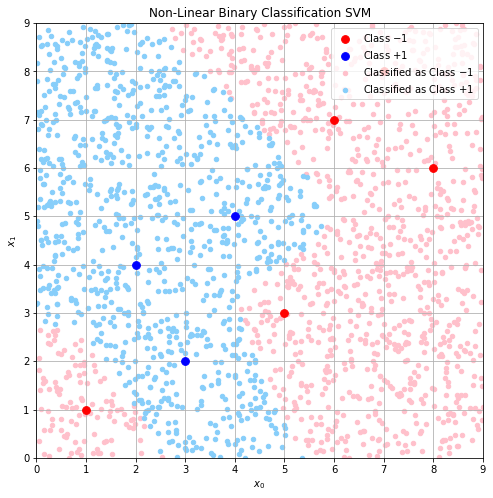

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




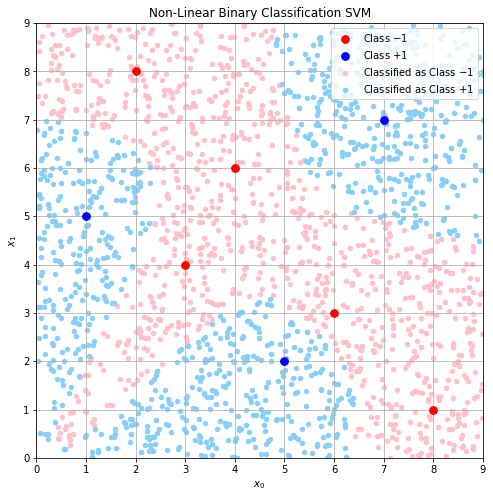

Itertions:
 748
Alphas:
 [0.02290024 0.15374857 0.16959514]
Support Vectors:
 [[2. 7.]
 [4. 2.]
 [7. 4.]]




In [19]:
# Non-Linear SVM Test 2

np.random.seed(9)

N = 2000

for T in [4, 8]:

    for plot in range(6):

        non_linear_svm = NonLinearSVM()

        X_train = np.zeros((T, 2))
        y_train = np.zeros(T)

        X_train[:, 0] = np.random.choice(range(1, 9), size=(T), replace=False)
        X_train[:, 1] = np.random.choice(range(1, 9), size=(T), replace=False)

        y_train[:] = np.random.choice([-1.0, +1.0], size=(T))
        if len(y_train[y_train == -1.0]) == 0:
            y_train[np.random.randint(0, T)] = -1.0    
        if len(y_train[y_train == +1.0]) == 0:
            y_train[np.random.randint(0, T)] = +1.0    

        non_linear_svm.train(X_train, y_train, gaussian_kernel, quadratic_penalty_dual_solver, steepest_descent)

        X_new = np.zeros((N, 2))

        for i in range(N):
            X_new[i, 0] = np.random.uniform(0.0, 9.0)
            X_new[i, 1] = np.random.uniform(0.0, 9.0)

        y_new = np.zeros(N)

        for i in range(N):
            y_new[i] = non_linear_svm.predict(X_train, y_train, gaussian_kernel, X_new[i])

        plt.figure(figsize=(8, 8))
        plt.xlim((0.0, 9.0))
        plt.ylim((0.0, 9.0))
        plt.scatter(X_train[y_train == -1.0, 0], X_train[y_train == -1.0, 1], color="red", s=60, zorder=2)
        plt.scatter(X_train[y_train == +1.0, 0], X_train[y_train == +1.0, 1], color="blue", s=60, zorder=2)
        plt.scatter(X_new[y_new == -1.0, 0], X_new[y_new == -1.0, 1], color="pink", s=20, zorder=1)
        plt.scatter(X_new[y_new == +1.0, 0], X_new[y_new == +1.0, 1], color="lightskyblue", s=20, zorder=1)
        plt.title("Non-Linear Binary Classification SVM")
        plt.xlabel("$x_0$")
        plt.ylabel("$x_1$")
        plt.legend([ "Class $-1$", "Class $+1$", "Classified as Class $-1$", "Classified as Class $+1$"], loc="upper right")
        plt.grid(zorder=0)
        plt.savefig("non_linear_svm_rand_qp_{}_{}.pdf".format(T, plot))
        plt.show()

        print("Itertions:\n", linear_svm.i)
        print("Alphas:\n", linear_svm.a)
        print("Support Vectors:\n", linear_svm.s)
        print("\n")
